# Examining road accidents in the UK

This project intends to investigate relationships between various paramters and road accidents in the UK. Licensed under Open Government Licence, the data provides detailed road safety data about the circumstances of personal injury road accidents in GB from 2005, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. Source: https://data.gov.uk/dataset/road-accidents-safety-data . I will first load in the data, examine it for missing values, look at data types, visualize the data to determine important information, and then will apply some modeling concepts to see if we can predict future outcomes and to determine feature importance.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.tools.set_credentials_file(username='w9641432', api_key='LDqLiys5zhXKvdyZc6J1')
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# For Notebooks
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

D:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


D:\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [141]:
acci = pd.read_csv('D:\Python\Insight\Transport\Accidents0515.csv')

In [142]:
acci.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date            ...              \
0                     1  04/01/2005            ...               
1                     1  05/01/2005            ...               
2                     1  06/01/2005            ...               
3                     1  07/01/2005            ...               
4                     1  10/01/2005            ...               

   Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0                                  0                                       1   
1                                  0                                       5   
2                                  0                                       0   
3                                  0                                       0   
4                                  0                                       0   

   Light_Conditions Weather_Conditions  Road_Surface_Conditions  \
0                 1                  2                        2   
1                 4                  1                        1   
2                 4                  1                        1   
3                 1                  1                        1   
4                 7                  1                        2   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  
0                                            1                  E01002849  
1                                            1                  E01002909  
2                                            1                  E01002857  
3                                            1                  E01002840  
4                                            1                  E01002863  

[5 rows x 32 columns]

In [143]:
acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
Accident_Index                                 object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                   int64
Accident_Severity                              int64
Number_of_Vehicles                             int64
Number_of_Casualties                           int64
Date                                           object
Day_of_Week                                    int64
Time                                           object
Local_Authority_(District)                     int64
Local_Authority_(Highway)                      object
1st_Road_Class                                 int64
1st_Road_Number                                int64
Road_Type                  

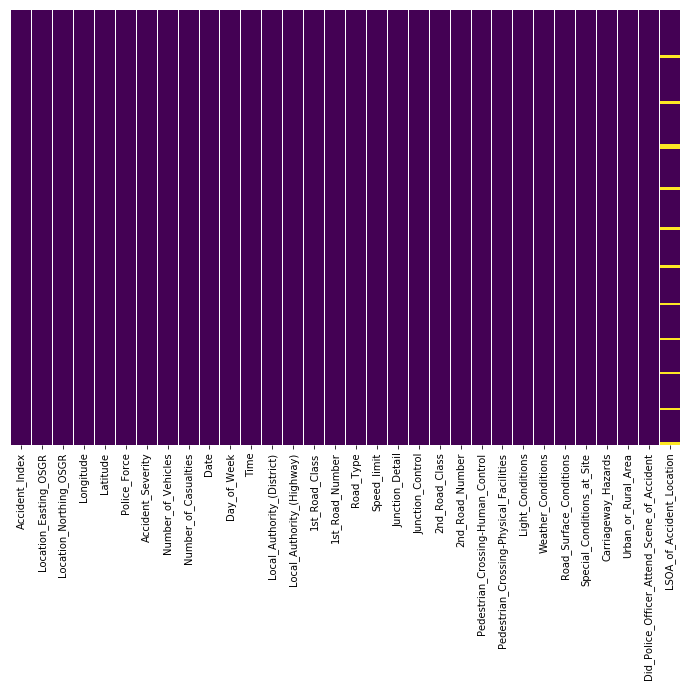

In [62]:
fig1, ax1 = plt.subplots(figsize=(12,8))
sns.heatmap(acci.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [144]:
# I don't intend on using the following column, and as it is fairly contaminated with nans, I will remove it
acci = acci.drop(['LSOA_of_Accident_Location'], axis=1)

acci = acci.dropna()
acci = acci.reset_index()
acci = acci.drop(columns=['index'])

acci.shape

(1780364, 31)

## Some data visualization 

In [145]:
pf = pd.read_csv('D:\Python\Insight\Transport\Police_Force.csv')
pf.columns = pf.columns.str.replace('code','Police_Force')
acci = pd.merge(acci,pf,how='inner',on='Police_Force')

acci.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date         ...           \
0                     1  04/01/2005         ...            
1                     1  05/01/2005         ...            
2                     1  06/01/2005         ...            
3                     1  07/01/2005         ...            
4                     1  10/01/2005         ...            

   Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0                                  0                                       1   
1                                  0                                       5   
2                                  0                                       0   
3                                  0                                       0   
4                                  0                                       0   

   Light_Conditions Weather_Conditions  Road_Surface_Conditions  \
0                 1                  2                        2   
1                 4                  1                        1   
2                 4                  1                        1   
3                 1                  1                        1   
4                 7                  1                        2   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident                label  
0                                            1  Metropolitan Police  
1                                            1  Metropolitan Police  
2                                            1  Metropolitan Police  
3                                            1  Metropolitan Police  
4                                            1  Metropolitan Police  

[5 rows x 32 columns]

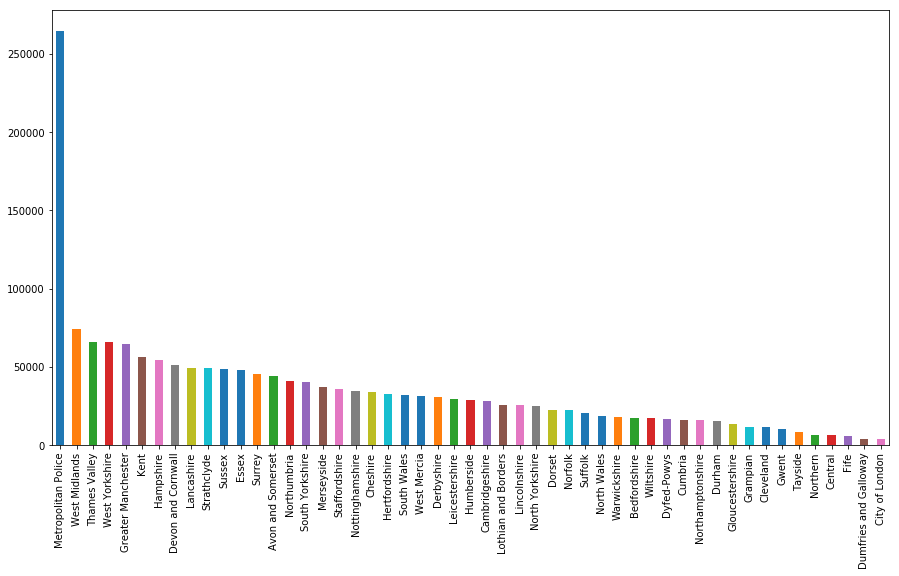

In [71]:
plt.figure(figsize=(15,8))
acci['label'].value_counts().plot(kind='bar')

This plot shows the total number of accicents per Police_Force, which is a good proxy for region. It can be seen that most accients are served by the Metropolitan police (Greater London are which serves about 9 million people). Second is the West Midlands (So Birmingham), and the Thames Valley (area stretching from Uxbridge out west towards Reading). These are heavily populated areas of England, with many highways and other A-class roads. More cars = Higher probability for accidents

The below plot shows each accident as a function of geo-location. As there are so many accidents, it actually shows a very good depiction of the British Isles (excl. NI).

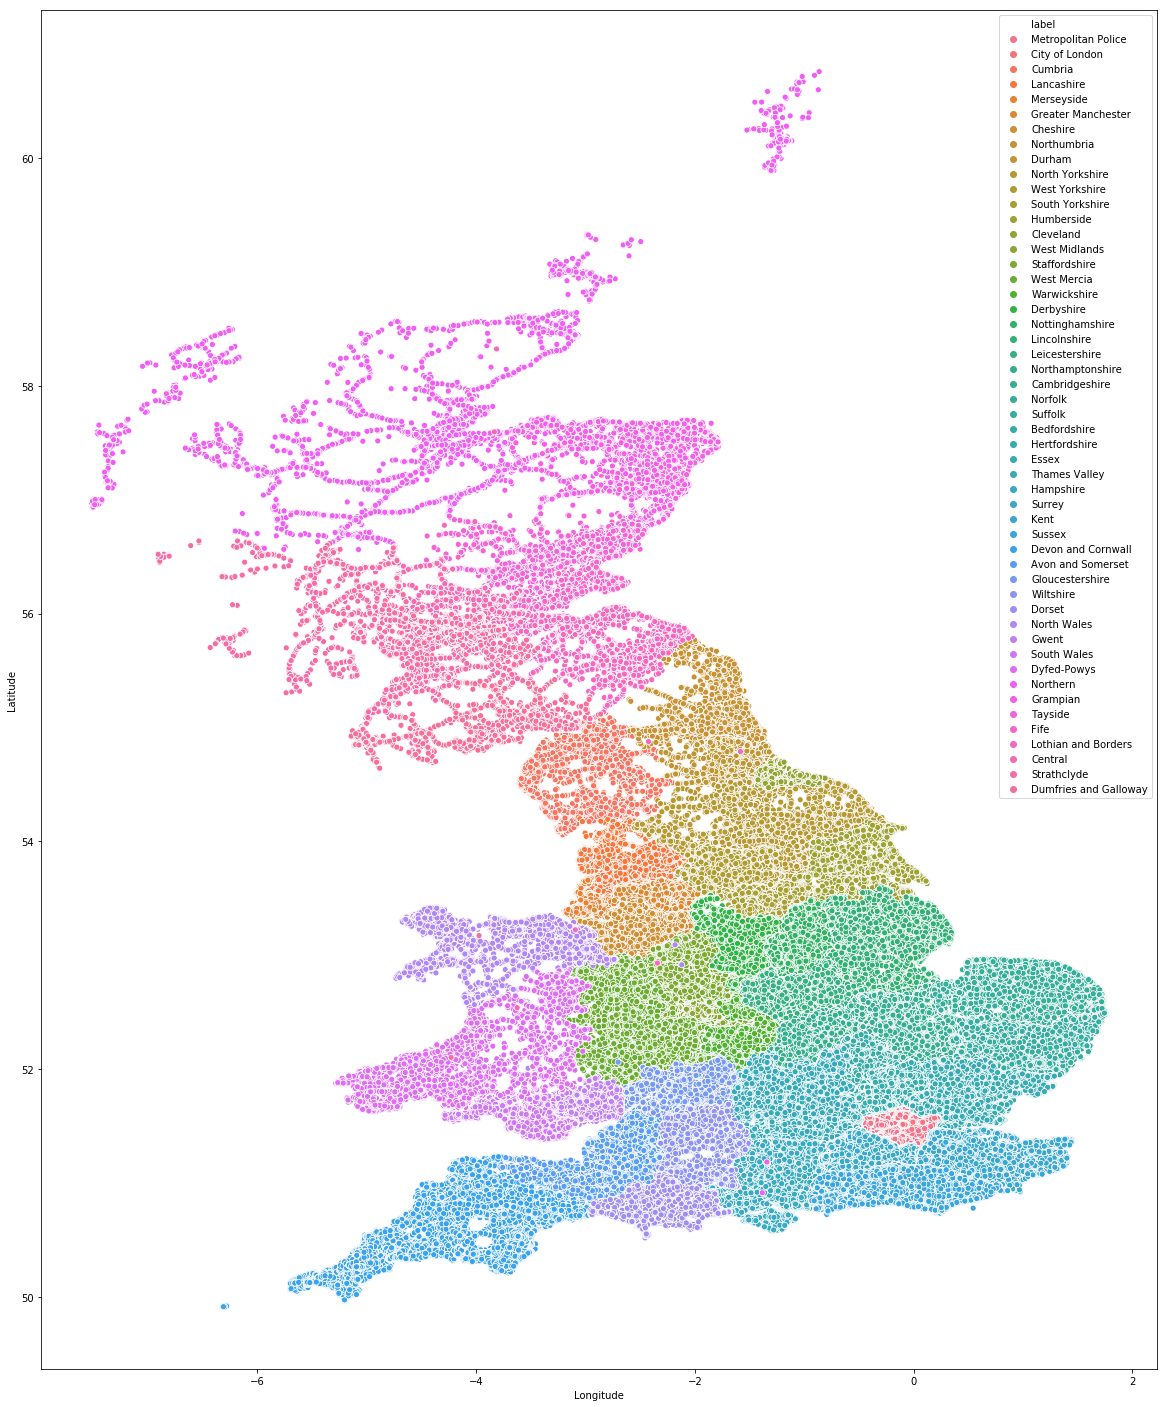

In [72]:
plt.figure(figsize=(20,25))
g = sns.scatterplot(x="Longitude", y="Latitude", hue='label', data=acci)


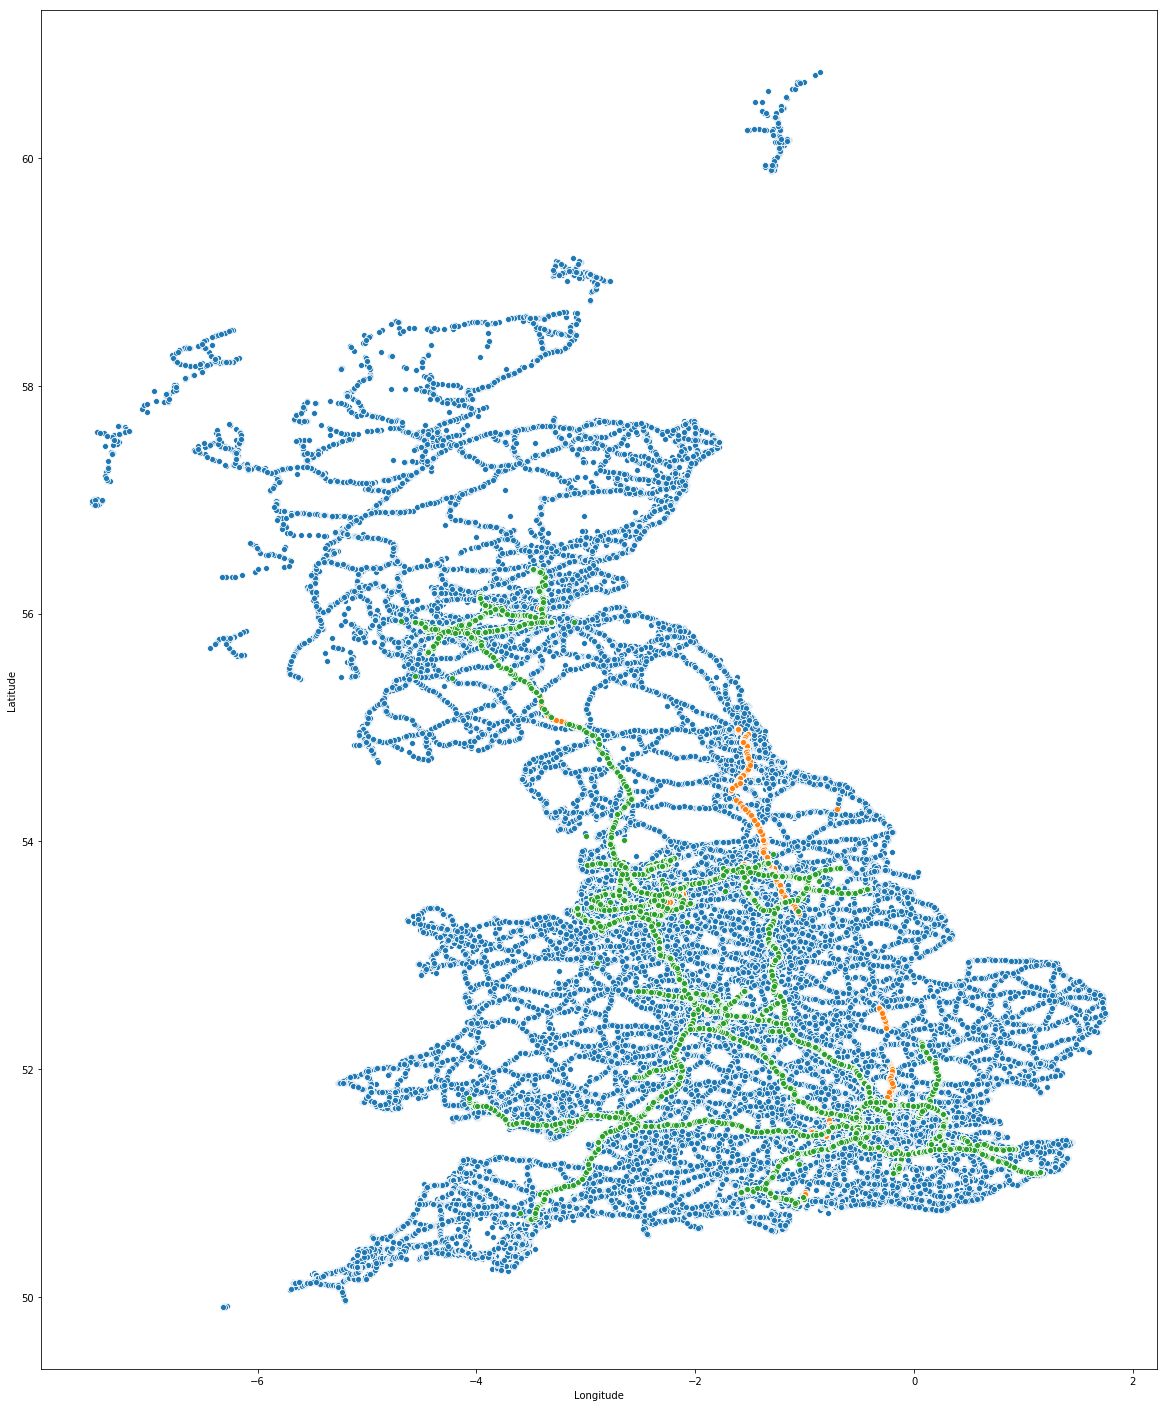

In [73]:
plt.figure(figsize=(20,25))

tmp = acci[(acci['1st_Road_Class']==3)]
g = sns.scatterplot(x="Longitude", y="Latitude", data=tmp)
tmp = acci[(acci['1st_Road_Class']==2)]
g = sns.scatterplot(x="Longitude", y="Latitude", data=tmp)
tmp = acci[(acci['1st_Road_Class']==1)]
g = sns.scatterplot(x="Longitude", y="Latitude", data=tmp)

Britain as depicted by its major road network system due to accidents. Blue are A-class roads, whilst green and orange are Highways. These are the busiest roads in the UK by volume of traffic

## The most dangerous roads in the UK based on numbers of accidents

In [74]:
acci['timestamp'] = pd.to_datetime(acci['Date'], format="%d/%m/%Y")
acci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780364 entries, 0 to 1780363
Data columns (total 33 columns):
Accident_Index                                 object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                   int64
Accident_Severity                              int64
Number_of_Vehicles                             int64
Number_of_Casualties                           int64
Date                                           object
Day_of_Week                                    int64
Time                                           object
Local_Authority_(District)                     int64
Local_Authority_(Highway)                      object
1st_Road_Class                                 int64
1st_Road_Number                                int64
Road_Type                  

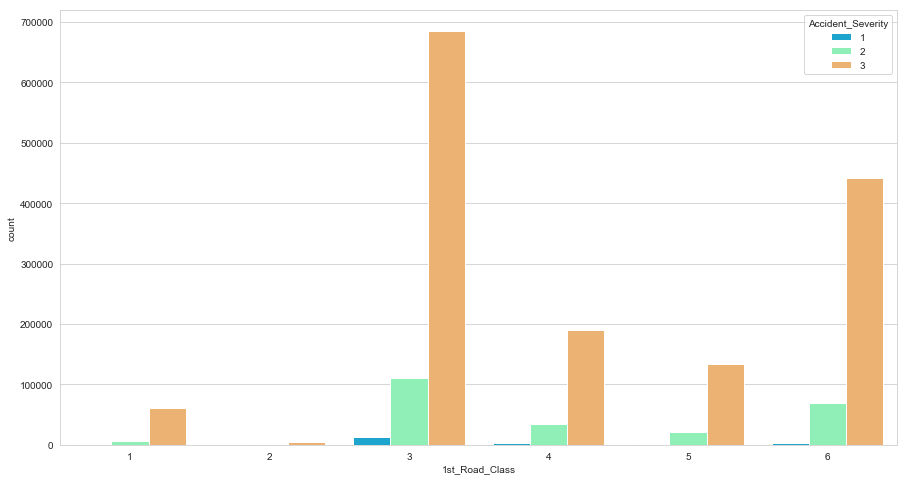

In [75]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='1st_Road_Class',hue='Accident_Severity',data=acci,palette='rainbow')


Here, we can see that most accidents on primary roads happended in class =3, which is A class roads. It is also here where most fatalities occur. B class roads (class=4) claimed the second most ammount of lives. The "other" category (class = 6) was second highest overall. Highways/Motorways saw the least amount of accidents

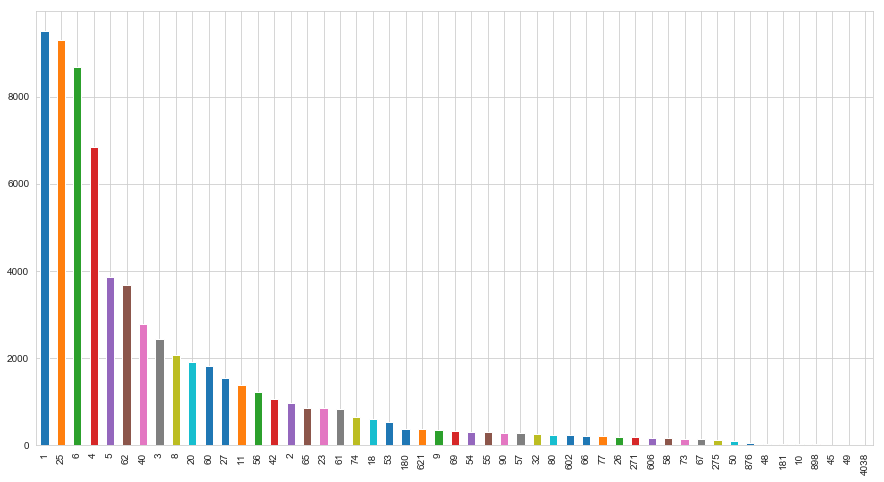

In [76]:
tmp = acci[acci['1st_Road_Class']==1]
plt.figure(figsize=(15,8))
tmp['1st_Road_Number'].value_counts().plot(kind='bar')

 Here is a list of the most dangerous motorways in Britain. The M1, M25 (or as Chris Rea called it: The road to Hell), M6, and M4 all have had more than 6000 accidents. They are also the most busy by volume

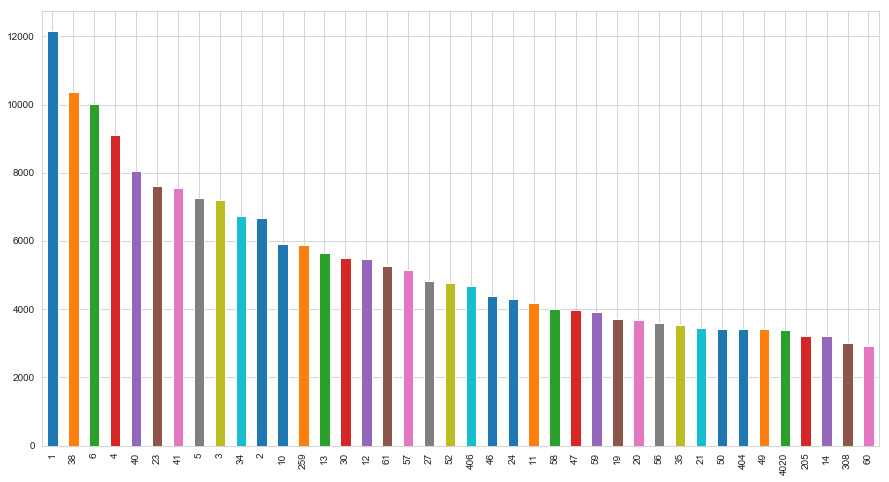

In [77]:
tmp = acci[(acci['1st_Road_Class']>1) & (acci['1st_Road_Class']<=3)]
plt.figure(figsize=(15,8))
tmp['1st_Road_Number'].value_counts().nlargest(40).plot(kind='bar')

Here is a plot of the 40 most dangerous A-class roads in the UK. The A1 had over 12000 accidents, whilst the A38 and A6 were closer to 10000 accidents. 

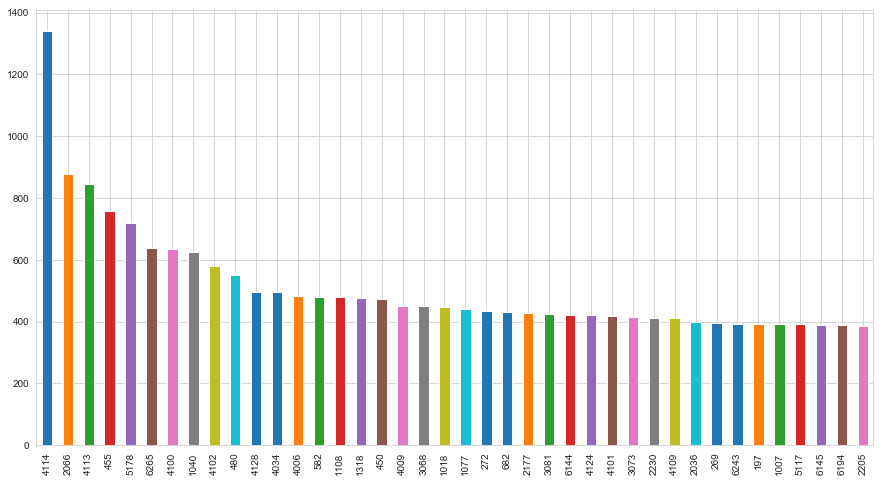

In [78]:
tmp = acci[acci['1st_Road_Class']==4]
plt.figure(figsize=(15,8))
tmp['1st_Road_Number'].value_counts().nlargest(40).plot(kind='bar')

 Here is a plot of the 40 most dangerous B-class roads in the UK. The B114 had over 1300 accidents, whilst the B2066 and B4113 were closer to 900 accidents. 

In [79]:
tmp = acci[acci['1st_Road_Class']>0]
df = tmp.groupby(['1st_Road_Class']).mean()


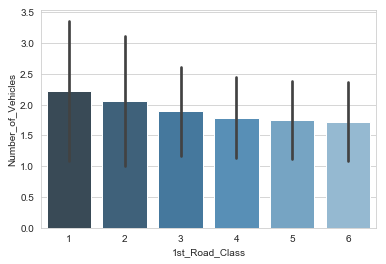

In [80]:
ax = sns.barplot(x="1st_Road_Class", y="Number_of_Vehicles", data=acci, ci='sd', palette = "Blues_d")


Motorways (1 + 2) had the largest number of average vehicles per accident. Makes the most sense given the faster speeds and late reaction times. The bars are the standard deviation of spread around the means

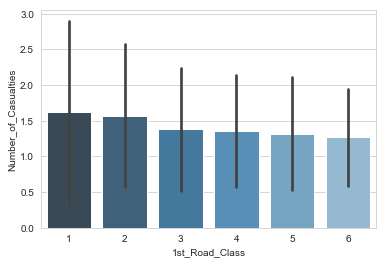

In [81]:
ax = sns.barplot(x="1st_Road_Class", y="Number_of_Casualties", data=acci, ci='sd', palette = "Blues_d")

Motorways (1+2 ) had the highest mean number of casualties per accident. Faster cars, greater impact. Bars are the standard deviation around the mean values

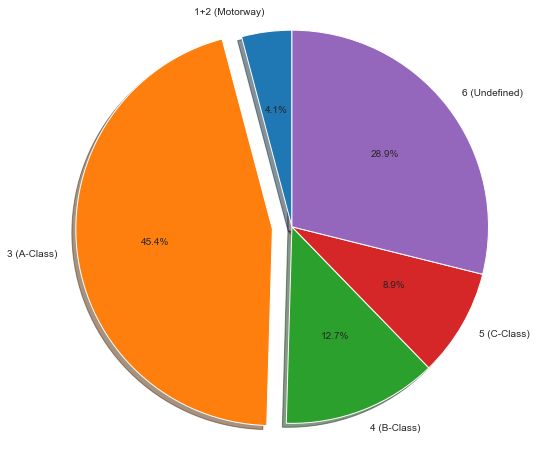

In [82]:
mwy = len(acci[acci['1st_Road_Class'] <3]) / len(acci)
Awy = len(acci[acci['1st_Road_Class'] ==3]) / len(acci)
Bwy = len(acci[acci['1st_Road_Class'] ==4]) / len(acci)
Cwy = len(acci[acci['1st_Road_Class'] ==5]) / len(acci)
und = len(acci[acci['1st_Road_Class'] >5]) / len(acci)

labels = '1+2 (Motorway)','3 (A-Class)','4 (B-Class)','5 (C-Class)','6 (Undefined)'

sizes = [mwy,Awy,Bwy,Cwy,und]
explode = (0, 0.1,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


This plot show the probability of what type of accident when could be in if you were driving on the given road class with respect to the other road classes. We can see that A-Class roads (3) have the highets probability (45.4%), whilst uncategorized (6) have the second highest (~29%). What the interesting take away here is that you are ~10 times more likely to be in an accident on an A-class road in comparison to motorways (1+2), but you have a higher chance (~15%) of dying if you have an accident on a motoroway compared to an A-Class road

## The most dangerous junctions

In [83]:
len(acci[acci['2nd_Road_Class'] != -1]) / len(acci)

0.5884515750711652

 Close to 60% of all accidents in the UK involve junctions, ie a second road. 

In [84]:
junc = acci[acci['2nd_Road_Class'] != -1]

#g = sns.scatterplot(x="Longitude", y="Latitude", hue='Accident_Severity', data=junc)

In [85]:
junc1 = junc.groupby(['Latitude','Longitude','Accident_Severity','2nd_Road_Class'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')
junc2 = junc1[junc1['count']>5]
junc2.head(10)

Latitude  Longitude  Accident_Severity  2nd_Road_Class  count
0  52.949719  -0.977611                  3               3     64
1  52.458798  -1.871043                  3               3     47
2  52.989857  -1.234393                  3               3     43
3  53.083165  -0.816789                  3               3     42
4  52.938860  -1.216694                  3               3     40
5  52.955058  -1.192286                  3               3     38
6  51.525866   0.029272                  3               3     37
7  52.967634  -1.190861                  3               4     37
8  52.944347  -1.190402                  3               3     36
9  51.560108  -0.115063                  3               3     35

Here I have grouped the locations of each accident and then counted the total number of accidents at each location. Below I plot the positions of the each accident and the size of each circle indicates the frequency of accident. A larger circle means more accidents

In [86]:
import math
from ast import literal_eval

def merc(lat,lon):
        
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

maxlat = junc2['Latitude'].max() 
minlat = junc2['Latitude'].min() 
maxlon = junc2['Longitude'].max() 
minlon = junc2['Longitude'].min() 

maxlat, maxlon = merc(maxlat,maxlon)
minlat, minlon = merc(minlat,minlon)

print(maxlat,maxlon)
print(minlat,minlon)

192935.37921919636 7791362.903205151
-589753.630340672 6482963.755420493


In [87]:
lats=[]
lons=[]

for i in range(0,len(junc2)):
    
    x,y = merc(junc2['Latitude'][i],junc2['Longitude'][i])
        
    lats.append(x)
    lons.append(y)
    
junc2['merc_lat'] = lats
junc2['merc_lon'] = lons
    
junc2.head()  

Latitude  Longitude  Accident_Severity  2nd_Road_Class  count  \
0  52.949719  -0.977611                  3               3     64   
1  52.458798  -1.871043                  3               3     47   
2  52.989857  -1.234393                  3               3     43   
3  53.083165  -0.816789                  3               3     42   
4  52.938860  -1.216694                  3               3     40   

        merc_lat      merc_lon  
0 -108827.158714  6.973703e+06  
1 -208283.554012  6.883511e+06  
2 -137412.000199  6.981122e+06  
3  -90924.535566  6.998396e+06  
4 -135441.756531  6.971697e+06

In [89]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON

output_file("tile.html")

# range bounds supplied in web mercator coordinates
p = figure(x_range=(minlat, maxlat), y_range=(minlon, maxlon),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)

from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x=junc2['merc_lat'],
         y=junc2['merc_lon'], 
         size=junc2['count'],
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...

 I have used a mecator projection aid to visualize junctions that have had atleast 5 accidents. Feel free to use the features on the right side of the plot to pan around and zoom in to get a better idea (This plot is also available as UK.html). It woudl appear there are some areas more suceptible than others and if you live in Binghsm ot passing through there, there is one particular roundabout you want to avoid. 64 accidents! A combination of poor driving and bad city planning! In fact there are quite a few hotspots around Nottingham that are particularly bad 

## Case study: The Thames Valley

Growing up in the coutryside in the Thames Valley, I have seen and had plenty of driving experience on its roads. I am curious to know which are the most dangerous roads in this region and plan to investigate this further. We can limit our database to just include Police emergencies that involved the Thames Valley Police

In [90]:
tvp = acci[acci['label']=='Thames Valley']
tvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66108 entries, 1164779 to 1230886
Data columns (total 33 columns):
Accident_Index                                 66108 non-null object
Location_Easting_OSGR                          66108 non-null float64
Location_Northing_OSGR                         66108 non-null float64
Longitude                                      66108 non-null float64
Latitude                                       66108 non-null float64
Police_Force                                   66108 non-null int64
Accident_Severity                              66108 non-null int64
Number_of_Vehicles                             66108 non-null int64
Number_of_Casualties                           66108 non-null int64
Date                                           66108 non-null object
Day_of_Week                                    66108 non-null int64
Time                                           66108 non-null object
Local_Authority_(District)                     66108 non

In [91]:
junc = tvp[tvp['2nd_Road_Class'] != -1]
junc1 = junc.groupby(['Latitude','Longitude','Accident_Severity','2nd_Road_Class'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')
junc2 = junc1[junc1['count']>5]
junc2.head(10)



Latitude  Longitude  Accident_Severity  2nd_Road_Class  count
0  52.036703  -0.676373                  3               6     19
1  51.494076  -0.849600                  3               3     16
2  51.402473  -0.705547                  3               4     15
3  51.507767  -0.580803                  3               3     13
4  51.529661  -0.653071                  3               6     13
5  51.496004  -0.604650                  3               4     12
6  51.749856  -1.243949                  3               4     12
7  51.595103  -0.628036                  3               3     12
8  51.953379  -0.761484                  3               5     11
9  52.005686  -0.733962                  3               6     11

In [92]:
maxlat = junc2['Latitude'].max() 
minlat = junc2['Latitude'].min() 
maxlon = junc2['Longitude'].max() 
minlon = junc2['Longitude'].min() 

maxlat, maxlon = merc(maxlat,maxlon)
minlat, minlon = merc(minlat,minlon)

print(maxlat,maxlon)
print(minlat,minlon)

-64654.694211205664 6815458.617707221
-160349.49259622616 6686951.407596038


In [93]:
lats=[]
lons=[]

for i in range(0,len(junc2)):
    
    x,y = merc(junc2['Latitude'][i],junc2['Longitude'][i])
        
    lats.append(x)
    lons.append(y)
    
junc2['merc_lat'] = lats
junc2['merc_lon'] = lons
    
junc2.head()    

Latitude  Longitude  Accident_Severity  2nd_Road_Class  count  \
0  52.036703  -0.676373                  3               6     19   
1  51.494076  -0.849600                  3               3     16   
2  51.402473  -0.705547                  3               4     15   
3  51.507767  -0.580803                  3               3     13   
4  51.529661  -0.653071                  3               6     13   

       merc_lat      merc_lon  
0 -75293.497946  6.806765e+06  
1 -94577.039378  6.709160e+06  
2 -78541.132771  6.692798e+06  
3 -64654.694211  6.711608e+06  
4 -72699.531172  6.715525e+06

In [94]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON

output_file("tile.html")

# range bounds supplied in web mercator coordinates
p = figure(x_range=(minlat, maxlat), y_range=(minlon, maxlon),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)


TileRenderer(id='1517', ...)

In [95]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
# range bounds supplied in web mercator coordinates
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x=junc2['merc_lat'],
         y=junc2['merc_lon'], 
         size=junc2['count'],
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...

The Thames Valley has had most accidents around Oxford, Although, Reading and Milton Keynes (Also as html file: ThamesValley.hmtl). I lived towards the bottom right corner and there are a few junctions that are to be avoided. Best tell the friends and family!

## Accidents due to speeding?

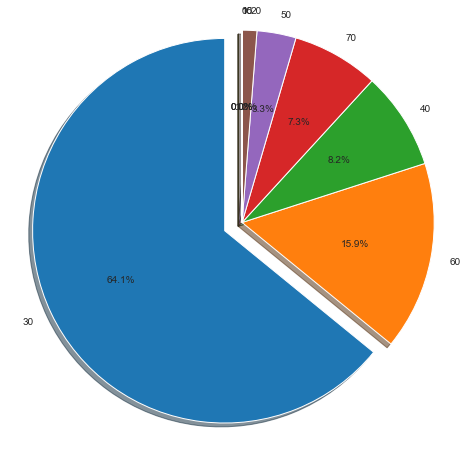

In [96]:
labels = '30', '60','40','70','50','20','10','15','0'

thirty = len((acci[acci['Speed_limit']==30])) / len(acci)
sixty = len((acci[acci['Speed_limit']==60])) / len(acci)
forty = len((acci[acci['Speed_limit']==40])) / len(acci)
sevnty = len((acci[acci['Speed_limit']==70])) / len(acci)
fifty = len((acci[acci['Speed_limit']==50])) / len(acci)
twenty = len((acci[acci['Speed_limit']==20])) / len(acci)
ten = len((acci[acci['Speed_limit']==10])) / len(acci)
fifteen = len((acci[acci['Speed_limit']==15])) / len(acci)
zero = len((acci[acci['Speed_limit']==0])) / len(acci)

sizes = [thirty,sixty,forty,sevnty,fifty,twenty,ten,fifteen,zero]
explode = (0.1, 0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots(figsize=(8,8))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

 It can be seen that more than 60% of accidents occurred on roads that had a speed limit of 30 mph, which is typically present for most B,C, and some A class roads

## Accidents and Time

<BarContainer object of 7 artists>

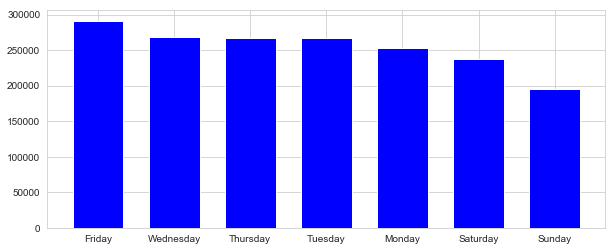

In [97]:
pf = pd.read_csv('D:\Python\Insight\Transport\Day_of_Week.csv')
pf.columns = pf.columns.str.replace('code','Day_of_Week')


doy = acci.groupby(['Day_of_Week'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')
doy = pd.merge(doy,pf,how='inner',on='Day_of_Week')
doy = doy.drop(columns=['Day_of_Week'])

fig, ax = plt.subplots(figsize=(10,4))
plt.bar(doy['label'], doy['count'],  1/1.5, color="blue")

Here is a bar chart of the total counts of accidents by day of week. Friday is worst and Sunday is best.

In [98]:
times = []
for i in range(0, len(acci)):
    
    times.append(float(acci['Time'][i][0:2]))
    
acci['Hour'] = times


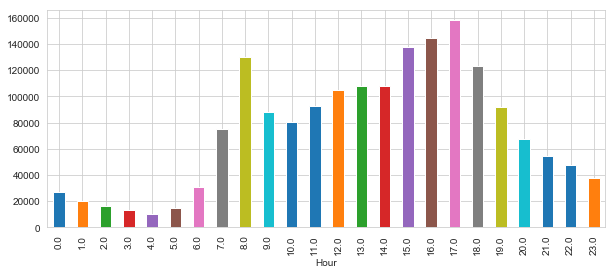

In [99]:
tod = acci.groupby(['Hour'], as_index=False).size().plot(kind='bar',figsize=(10,4))

This is a bar chart of the total number accidents by hour and there is a clear pattern that there are fewer accidents in the earlier hours of the morning, then peaks around rush hour with an increase during the day as the amount of activity increases maxing again at the 5 O'Clock rush and then starts to decrease again

## Accident Time Series

In [100]:
tid = acci.groupby(['timestamp'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')
tid = tid.sort_values(by=['timestamp']).reset_index()
tid = tid.drop(['index'], axis=1)
tid.head(10)


timestamp  count
0 2005-01-01    308
1 2005-01-02    305
2 2005-01-03    293
3 2005-01-04    473
4 2005-01-05    523
5 2005-01-06    553
6 2005-01-07    510
7 2005-01-08    439
8 2005-01-09    357
9 2005-01-10    523

In [101]:
data = [go.Scatter( x=tid['timestamp'], y=tid['count'] )]

py.iplot(data, filename='pandas-time-series')

This is a plot that shows the time series of the total number of accidents each day in the UK. It can be seen that that over time there is a negative trend indicating that the roads have become safer. In order to fit a model to this time series, it would be better to produce a monthly mean series to reduce the level of noise in the data

In [102]:
mtid = tid.resample('M', on='timestamp').mean()

mtid['timestamp'] = mtid.index
mtid = mtid.reset_index(drop=True)
data = [go.Scatter( x=mtid['timestamp'], y=mtid['count'], marker = dict(color = '#FFBAD2' ))]

py.iplot(data, filename='pandas-time-series')


Here is a monthly mean time series of accidents. We can see the same trend as well as possible seasonal patterns in the time series. The decline in values appear linear up until 2013 where it seems to level off for the next two years. Let's assume that the relationship is linear and try and fit a SARIMA model to the time series

In [103]:
import warnings
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

 When looking to fit time series data with a seasonal ARIMA model, our first goal is to find the values of SARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of SARIMA models can be a painstaking manual process that requires domain expertise and time. I will resolve this issue by writing Python code to programmatically select the optimal parameter values for our SARIMA(p,d,q)(P,D,Q)s time series model.

In [104]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2) # range(0, 3) # for higher orders

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


 I will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, I fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once I have explored the entire landscape of parameters, the optimal set of parameters will be the one that yields the best performance for the criteria of interest. Let's begin by generating the various combination of parameters that we wish to asses

In [105]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(mtid['count'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1972.5273172016941
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1661.8757490225044
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1166.5254517969577
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1052.514393371087
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1137.0232456286535
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1099.8075502294478
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1061.0906781613521
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1030.9967438229644
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1802.023727346528
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1519.1047423716775
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1149.4746599258033
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1030.2378518514315
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1140.2327790662657
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.2283721835909
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1044.9616168549549
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1028.2058091421745
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1299.139019955333
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1165.175240356

We can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. In Statistics and Machine Learning, this process is known as grid search (or hyperparameter optimization) for model selection.

When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. Here, I use use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding models that yield the lowest AIC value.

Here, I have chosen SARIMAX with order 

The code chunk above iterates through combinations of parameters and uses the SARIMAX function from statsmodels to fit the corresponding Seasonal ARIMA model. Here, the order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

In [106]:
mod = sm.tsa.statespace.SARIMAX(mtid['count'],
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3013      0.098     -3.084      0.002      -0.493      -0.110
ma.S.L12      -1.0676      0.660     -1.619      0.106      -2.360       0.225
sigma2       451.7244    340.287      1.327      0.184    -215.227    1118.676


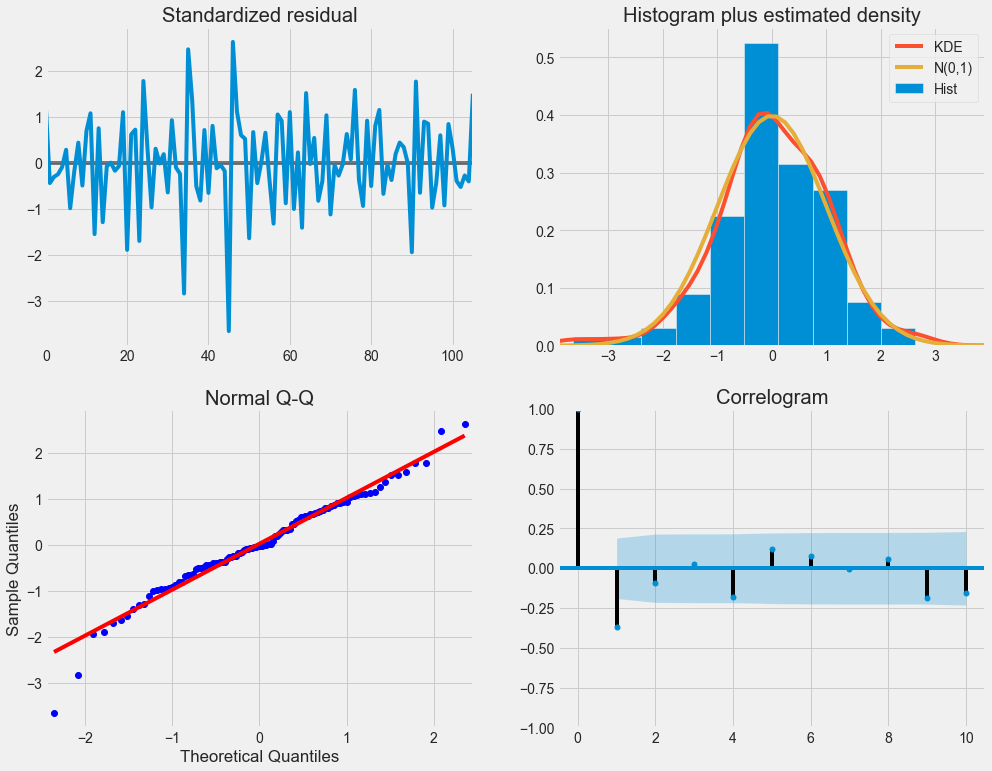

In [107]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

I have experimented with various model setups which produced AIC scores of less than 990, but will show a specific exmaple here where the SARIMAX set up: ARIMA(0, 1, 0)x(1, 1, 1, 12)12. Here, we will only be considering seasonal features. Consulting the coefficients and p-values from the results summary we see that the most significant (using alpha=0.05) parameter is the AR of lag 12 months, although moving average of 12 months is significant at alpha=0.1. From the plots, we expect that the residuals from the observations and theoretical model are uncorrelated and randomly distributed. If the model does not exhibit these features, then we can probably improve our fit by changing some of the parameters.

The top left plot shows the residuals, which appears to be stationary and distriubted as white noise, whilst we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed. The correlogram shows shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values. Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

In [108]:
pred = results.get_prediction()
pred_ci = pred.conf_int()
forecast = results.get_forecast(36)
forecast_ci = forecast.conf_int()

arima = pd.DataFrame(data=pred.predicted_mean)
arima['lower'] =  pred_ci.iloc[:, 0]
arima['upper'] =  pred_ci.iloc[:, 1]
arima['orig']  = mtid['count']
arima.columns = ['average','lower','upper','orig']
arima.index = pd.date_range(start='2005-01-01', end='2015-12-01',  freq='MS', closed=None)

future= pd.DataFrame(data=forecast.predicted_mean)
future['lower'] =  forecast_ci.iloc[:, 0]
future['upper'] =  forecast_ci.iloc[:, 1]
future.columns = ['average','lower','upper']
future.index = pd.date_range(start='2015-01-01', end='2017-12-01',  freq='MS', closed=None)

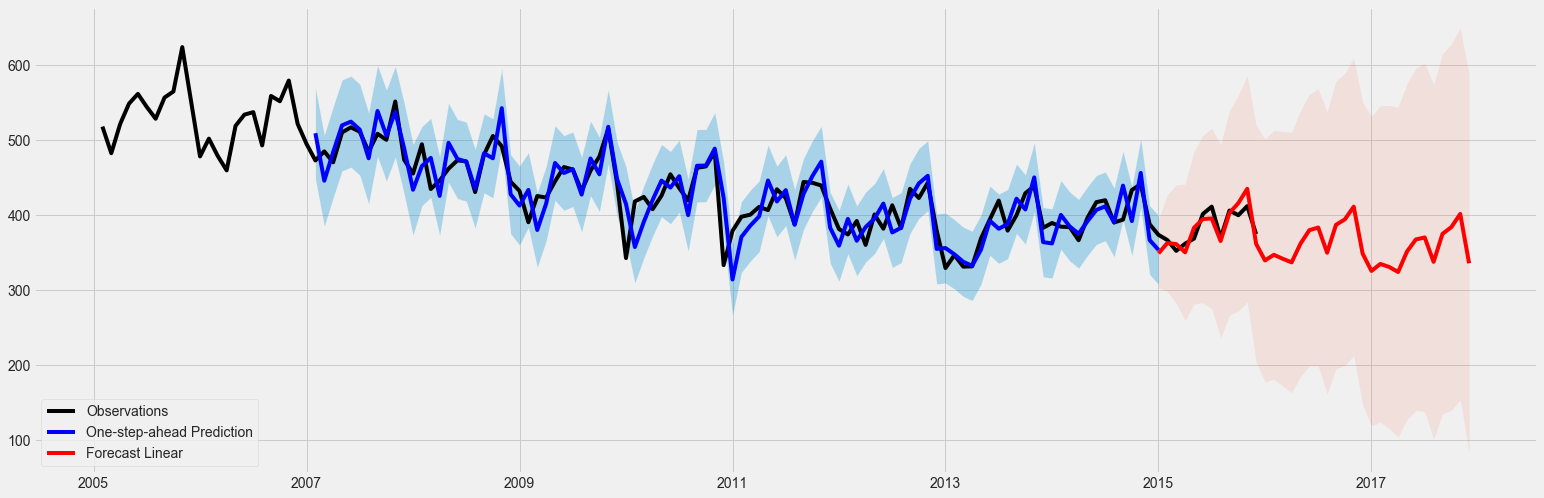

In [109]:
fig, ax = plt.subplots(figsize=(24,8))

arima['orig'][1:].plot(ax=ax,  style='k-', label='Observations')
arima['average'][25:121].plot(ax=ax,  style='b-', label='One-step-ahead Prediction')
pred_ci = pred.conf_int(alpha=0.05)
pred_index = arima.index
ax.fill_between(pred_index[25:121], arima['lower'][25:121], arima['upper'][25:121], alpha=0.3)

future['average'].plot(ax=ax, style='r', label='Forecast Linear')
forecast_index = future.index
ax.fill_between(forecast_index, future['lower'], future['upper'], alpha=0.1)


# Cleanup the image
#ax.set_ylim((4, 8));
legend = ax.legend(loc='lower left');

In [110]:
y_model = arima['average'][25:]
y_truth = arima['orig'][25:]

# Compute the mean square error
mse = ((y_model - y_truth) ** 2).mean()
print('The Mean Squared Error of the SARIMA is {}'.format(round(mse, 2)))

y_forecasted = future['average'][:13]
y_truth = arima['orig'][122:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of the Forecast is {}'.format(round(mse, 2)))

The Mean Squared Error of the SARIMA is 626.08
The Mean Squared Error of the Forecast is 170.35


Here, I have plotted the observations and the SARIMA model using the chosen parameters for pdq and PDQs. The SARIMA captures alot of the seasonality and behaviour of the observations as well as capturing the downward trend. The model fit based on the MSE is 588. Ideally, we would want this number as close to zero as possible, and by using differing paramters this could be explored. The forecast is shown in red and predicts three years into the future. The SARIMA is stopped intentionally short by one year, acting as training data, and one is left over as test data to compare to the foecast. The MSE of the forecast is 160, which is fairly good. The range of uncertainty increases for the forecast over time.

This model is fairly basic. We have assumed a linear relationship with accidents over time, but this assumption might not be true. Further investigation would be needed to see if more advanced SARIMA models would fit the data better.




# Are 2015 roads safer than 2005?

From the previous section, we saw that the roads have become safer over time, but can we be confident that this is the case? Here, I perform a significance test using a T-Test to determine if this is the case. To do this, I will compare mean values and their distributions of accidents in 2005 and 2015. 

Null-Hypothesis Ho = That the road safety in 2005 and 2015 is the same.
Alternative Hypothesis Ha = Roads are safer in 2015.

 We are looking a one-tailed test and I will use an alpha = 0.05


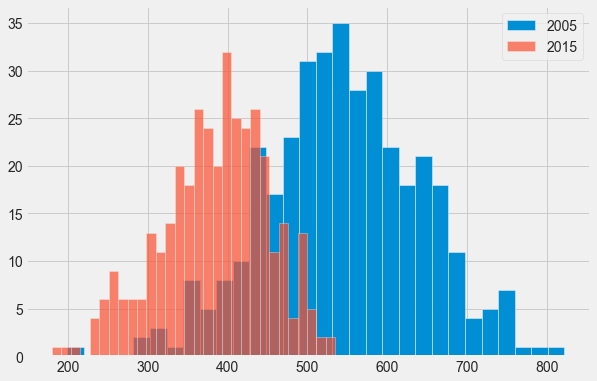

In [111]:
tid['year'] = tid.timestamp.map(lambda x: x.strftime('%Y'))
tid.head()


fig, ax = plt.subplots(figsize=(9,6))
tid.loc[tid['year'] == '2005', 'count'].hist(bins=30, alpha = 1)
tid.loc[tid['year'] == '2015', 'count'].hist(bins=30, alpha = 0.7)
ax.legend(['2005', '2015'])

Here is a histogram of the distributions of accidents in 2005 and 2015. The distributions between 2005 and 2015 show gaussian tendencies, so we can assume that we can use Gaussian statistics

In [112]:
tof = tid.loc[tid['year'] == '2005', 'count'].mean()
tofstd = tid.loc[tid['year'] == '2005', 'count'].std()
tff = tid.loc[tid['year'] == '2015', 'count'].mean()
tffstd = tid.loc[tid['year'] == '2015', 'count'].std()

print(str(tof) + ' +/- ' + str(tofstd))
print(str(tff) + ' +/- ' + str(tffstd))


544.2109589041096 +/- 97.33377992627902
383.5917808219178 +/- 66.55209839209721


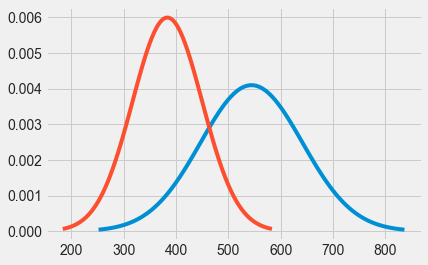

In [113]:
import matplotlib.mlab as mlab
hox = np.linspace(tof - 3*tofstd, tof + 3*tofstd, 100)
plt.plot(hox,mlab.normpdf(hox, tof, tofstd))


hax = np.linspace(tff - 3*tffstd, tff + 3*tffstd, 100)
plt.plot(hax,mlab.normpdf(hax, tff, tffstd))
plt.show()



#### Normal distributions of each class, 2005 (blue), 2015 (red)

### T-Test

In [114]:
# Student t-distribution Percent Point Function
from scipy.stats import t
# define probability
p = 0.95
df = 364 # n-1
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

1.6490505451718542
0.949999999999997


Critical T-value to beat in order to get a significant result and hence reject the Null hypothesis

In [115]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 365

a = tid.loc[tid['year'] == '2005', 'count']
b = tid.loc[tid['year'] == '2015', 'count']


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

# Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print("t = " + str(t))
print("p = " + str(p))

## Cross Checking with the internal scipy function using Welch's T-Test
t2, p2 = stats.ttest_ind(a,b,equal_var=False)
print("t = " + str(t2))
print("p = " + str(p2))

t = 26.024886464965203
p = 0.0
t = 26.024886464965203
p = 1.4874553053755505e-102


As we are comparing two means, we can use the independent T-Test (Welch's as variances differ). If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations. In this case, the T-statistic is 26 >> 1.65, plus we can concur from the P-value, which << 0.05 that we can reject the Null hypothesis and conclude that roads are significantly safer by a gigantic margin compared to 2005. 

In [116]:
a = tid.loc[tid['year'] == '2005', 'count']
b = tid.loc[tid['year'] == '2006', 'count']

t3, p3 = stats.ttest_ind(a,b,equal_var=False)
print("t = " + str(t3))
print("p = " + str(p3))

t = 3.684303764921747
p = 0.0002463566925246159


 In fact, by 2006, the roads were significantly safer than 2005 according to the above T-test comparison.  T-stat = 3.7 > T-crit = 1.65 rendering a p-value = 0.0002 << alpha = 0.05

## Machine learning to predict accident location

Examing this dataset I noticed a column that states if accidents occurred in rural or urban areas. This sets up the possibility to predict a binary classifier problem using input parameters. 

Urban: 0.6438981017364989
Rural: 0.3561018982635012


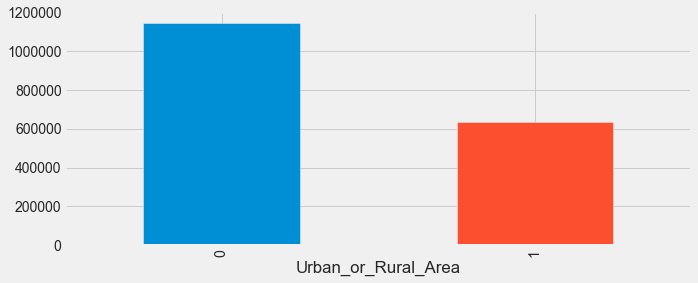

In [117]:
acci.loc[acci.Urban_or_Rural_Area != 2, 'Urban_or_Rural_Area'] = 0
acci.loc[acci.Urban_or_Rural_Area == 2, 'Urban_or_Rural_Area'] = 1


acci.groupby(['Urban_or_Rural_Area'], as_index=False).size().plot(kind='bar',figsize=(10,4))
tod = acci.groupby(['Urban_or_Rural_Area'], as_index=False).size().sort_values(ascending=False).reset_index(name='count')

urban = tod['count'][0] / (tod['count'][0] + tod['count'][1])
rural = tod['count'][1] / (tod['count'][0] + tod['count'][1])

print('Urban: ' + str(urban))
print('Rural: ' + str(rural))

The first thing we need to establish is the relationship between accidents occurring in both urban and rural areas. This is important because we want to be able to identify any class imbalance. If one class has many more instances than the other, then standard classifiers tend ot be overwhelmed by the larger class and ignore the smaller one. Here we see that about 2/3 of all accidents happen in urban areas. I will first try to predict with the classses as they are, but will try ammend any problem that occurs later

In [119]:
X = acci.drop(['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Time',
 'Junction_Control',             
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Number',
 '2nd_Road_Number',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'timestamp',
 'label',
 'Date'             
              ], axis=1)

X.head()

Day_of_Week  1st_Road_Class  Road_Type  Speed_limit  Junction_Detail  \
0            3               3          6           30                0   
1            4               4          3           30                6   
2            5               5          6           30                0   
3            6               3          6           30                0   
4            2               6          6           30                0   

   2nd_Road_Class  Pedestrian_Crossing-Human_Control  \
0              -1                                  0   
1               5                                  0   
2              -1                                  0   
3              -1                                  0   
4              -1                                  0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                        1                 1   
1                                        5                 4   
2                                        0                 4   
3                                        0                 1   
4                                        0                 7   

   Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                   2                        2                           0   
1                   1                        1                           0   
2                   1                        1                           0   
3                   1                        1                           0   
4                   1                        2                           0   

   Carriageway_Hazards  Hour  
0                    0  17.0  
1                    0  17.0  
2                    0   0.0  
3                    0  10.0  
4                    0  21.0

 We need to build a data set with independent variables that can help classify our output. These would be parameters that are plausible impactors to accidents. They are not the reason why the accidents occurred, but they are the challenges and stressors placed on drivers that can ultimately lead to an accident. I have created the above table with such stressors. Also included is day or week and hour of day as I have shown the impact of time as being an important factor automobile movements. More traffic implies large stress factor 

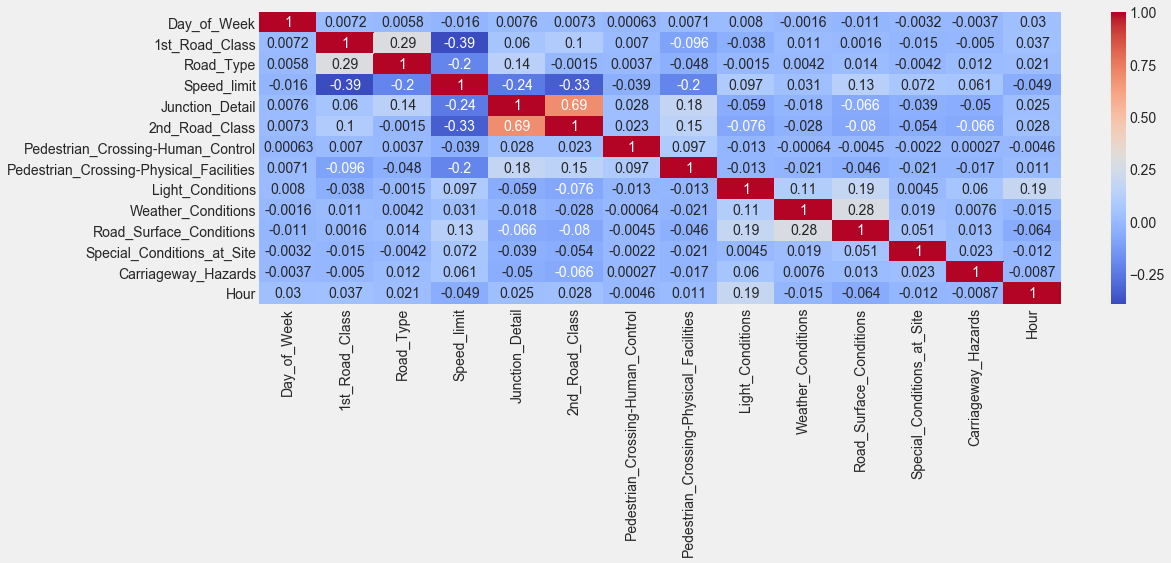

In [120]:
plt.figure(figsize = (16,5))
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)


This correlation plot is intended to show if there are any parameters are show collinear behaviour. General Linearised and linear regression models don't work well if the predicting features are similar (i.e. collinear) as they have a hard time assigning coefficient values to multicollinear paramters and can reak havoc in general. Only one relationship is showing some form of possible collinearity and that is 2nd_road_class and Junction_detail (0.69). We can investigate this further by consulting the value inflation score of these two parameters. 

In [125]:
import scipy as sp
val=data
ck = np.column_stack([acci['2nd_Road_Class'],acci['Junction_Detail']])
cc = sp.corrcoef(ck, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal()

array([1.92359366, 1.92359366])

We would be worried about collinearity VIF scores were above 5. Here, we see that the VIF is ~ 2, which is low enough for us not to be too concerned about a possible collinearity issue

## Logistic Regression

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,acci['Urban_or_Rural_Area'], test_size=0.30)




In [127]:
from sklearn.linear_model import LogisticRegression  
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
predictions = logmodel.predict(X_test)
pred_yt = logmodel.predict(X_train)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



In [130]:
print('Accuracy test: ' + str(accuracy_score(y_test, predictions)))
print('Accuracy train: ' + str(accuracy_score(y_train,pred_yt)))

print(classification_report(y_test,predictions))

Accuracy test: 0.8574769242290914
Accuracy train: 0.8575683608638367
             precision    recall  f1-score   support

          0       0.84      0.95      0.90    343654
          1       0.89      0.68      0.77    190456

avg / total       0.86      0.86      0.85    534110



In [131]:
confusion_matrix(y_test,predictions)

array([[328047,  15607],
       [ 60516, 129940]], dtype=int64)

Confusion matrix = 

TP = 328047, = Correctly classified as Urban

TN = 129940, = Correctly classified as Rural

FP = 15607, = Classified as Urban when Rural

FN = 60516, = Classified Rural when Urban


Above are the results of the LR model. First off, the percentage of TP (TP/N) and TN (TN/N) classified correctly by the model are below. 

TP/N = 61% = Urban. ==> 39% Rural

in comparison to 65 % Urban and 35% Rural in the data itself.

This overall result shows that eventhough there is a class difference in our predicted variable, the LR model still does a pretty good job of classiying the data to about the same ratio. This would imply we would not need to over/undersample our training data. The miss-classification (FP and FN)rates are also divided similarly. 

The overall accuracy ((TN + TP) / N) score here for training and test sets is about 85%. Accuracy does not always provide a useful metric for classification especially if there is a large class imbalance. However, we have shown that the model classifies to the ratio in the data fairly well. Essentially our model is predicting a true classification 8.5 out of 10. Another important takeaway here is that the both training and test data fit well with the assigned model, hence we have good reason to believe that there is not any reason to worry about overfitting.

More useful metrics are precision (TP / (TP + FP)) and recall (TP/ (TP + FN)). 

Precision:

When it predicts yes, how often is it correct?. The precision for each class are fairly similar (84,89 %). Precision is a good measure to determine, when the costs of False Positive is high

Recall:

When the result is yes, how often is it correct?. The recall is very different between the classes. For Urban classification recall was close to 100%, but was close to 70% for rural classification. Basically, the model had a harder time with rural prediction of true vales. We know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

F1 Score: 

F1 Score (2* (recall*precision / (recall+precision))) is needed when you want to seek a balance between Precision and Recall. Right…so what is the difference between F1 Score and Accuracy then? We have previously seen that accuracy can be largely contributed by a large number of TN which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible), thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives). Here our f1-scores are 0.9 ans 0.77 for Urban and rural roads, respectively. The overall f1-score is 0.85. The higher the f1 score, the better







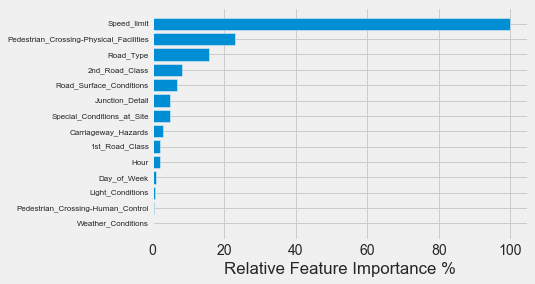

<Figure size 1152x360 with 0 Axes>

In [133]:
feature_importance = abs(logmodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance %')

plt.figure(figsize = (16,5))
plt.tight_layout()   
plt.show()

This plot shows the relative importance of each feature. Each feature is weighted to the maximum overall coefficient value (hence normalized). We see that the speed limit parameter is by far the most important feature, whilst Pedestrian crossing physical facilities and road type are second and third. This makes some conceptual sense given what we know or hear about road accidents in the news or via some other form of information.

## Random Forest

In [134]:
from sklearn.model_selection import train_test_split
score_test=[]
score_train=[]
tmp = pd.DataFrame(np.nan, index=X_train.columns.values, columns=[1])

for i in range(0,10): 
    

    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report,confusion_matrix


    from sklearn.ensemble import RandomForestClassifier


    classifier = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5, max_features=13, 
                                      min_samples_leaf=3, min_samples_split=2, bootstrap=True, criterion='gini')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    from sklearn import metrics
    
    score_test.append(classifier.score(X_test,y_test))
    score_train.append( classifier.score(X_train,y_train))
    feature_import = pd.DataFrame(data=classifier.feature_importances_, index=X_train.columns.values, columns=[i])
    tmp = pd.concat([tmp,feature_import], axis=1, sort=False)



print('train: ' + str(np.sum(score_train)/10))
print('test: '+ str(np.sum(score_test)/10))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
#met.roc_auc_score(y_test, y_pred)


train: 0.8685396395919291
test: 0.8683473441800377
[[323216  20438]
 [ 49879 140577]]
             precision    recall  f1-score   support

          0       0.87      0.94      0.90    343654
          1       0.87      0.74      0.80    190456

avg / total       0.87      0.87      0.87    534110



Here, I perform a random forest classification to compare to the LR model. We can see that the model compares well to LR, if not performing a little better. There is more consistency between recall values as well as f1-scores, whilst yielding favourable overall precision and recall values

In [135]:
feature_importances = pd.DataFrame(100*classifier.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
Speed_limit                               90.582637
Road_Type                                  3.951489
Pedestrian_Crossing-Physical_Facilities    1.832835
Light_Conditions                           1.586191
2nd_Road_Class                             1.356973
Junction_Detail                            0.608953
1st_Road_Class                             0.080322
Special_Conditions_at_Site                 0.000599
Day_of_Week                                0.000000
Pedestrian_Crossing-Human_Control          0.000000
Weather_Conditions                         0.000000
Road_Surface_Conditions                    0.000000
Carriageway_Hazards                        0.000000
Hour                                       0.000000

Feature importances are provided from the random forest. The agree well with the LR model, although road type is 2nd in the list and Pedestrian physical crossing facilities is bumped to third. 

# ROC curves

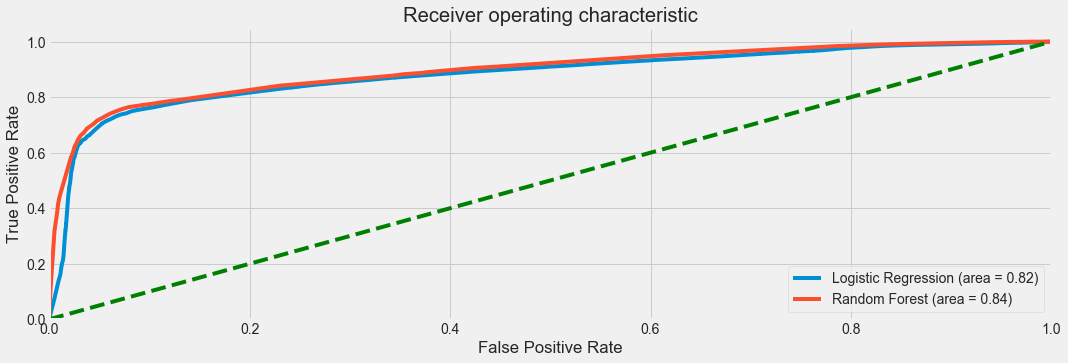

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
logit_roc_auc1 = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize = (16,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr1, tpr1, label='Random Forest (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The Receiver operating characteristic is an important tool in the evaulation of the model's results. ROC is a probability curve and AUC (Area under the curve) represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. The dashed line represents the model as a random classifier and the blue curve and orange curves are the LR and RF models, respectively. We want the model lines and the random classifier line to be far away from each other as possible. Ideally, we would want two model curves has and as to the left as possible as this would indicate an excellent classification rate to TPs to FPs. The AUC falls between 0 and 1, with a higher number meaning a better classification rate. We see here that the RF model performs slightly better than the LR model. A totally random model would have a AUC of 0.5

# Summary

In this quick project, I have examined British accident data to find some interesting behaviour and relationships, as well as, tried to model and predict future accident evolution, and determine some of the most important features that are related to these accidents. There is so much more to be discovered here with this data, but for now, this is a good start!

Perhaps the most important finding is that I have shown that there are significantly less accidents in 2015 compared to 2005, but still a major concern and the most important reason for accidents is due to speeding. 